In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

%matplotlib

Using matplotlib backend: MacOSX


In [15]:
sample_num = 200
w = 3
x = np.linspace(-5, 5, num=sample_num)
noise = norm.rvs(loc=2, scale=1, size=sample_num)
y = w * x + noise

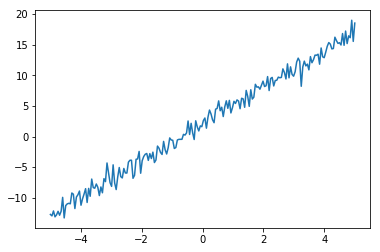

In [16]:
plt.plot(x, y)

In [17]:
model_code = '''
data {
int<lower=0> n;
vector[n] x;
vector[n] y;
}

parameters {
real w;
real theta;
real sigma;
}

model {
(y - w * x) ~ normal(theta, sigma);
}
'''

In [18]:
from pystan import StanModel
model = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_094103c601a9e5d4a91f6f19759b6215 NOW.


In [19]:
model.optimizing(data={'x': x, 'y': y, 'n': sample_num}, iter=1000)

OrderedDict([('w', array(2.98852733)),
             ('theta', array(2.08196862)),
             ('sigma', array(0.9842987))])